In [13]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  

In [3]:
df = pd.read_csv("csv/diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
X = df[["Glucose"]]  # Feature (independent variable)
Y = df["Outcome"]  # Target (dependent variable)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
print("Training Set:")
print(X_train)
print(Y_train)

print("\nTesting Set:")
print(X_test)
print(Y_test)

Training Set:
     Glucose
60        84
618      112
346      139
294      161
231      134
..       ...
71       139
106       96
270      101
435      141
102      125

[614 rows x 1 columns]
60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

Testing Set:
     Glucose
668       98
324      112
624      108
690      107
473      136
..       ...
355      165
534       77
344       95
296      146
462       74

[154 rows x 1 columns]
668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64


In [31]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [33]:
print(f"Intercept (b): {model.intercept_:.2f}")  # No indexing needed
print(f"Coefficient (m): {model.coef_[0]:.2f}")  # Use [0] to extract number

Intercept (b): -0.47
Coefficient (m): 0.01


In [36]:
Y_pred = model.predict(X_test)

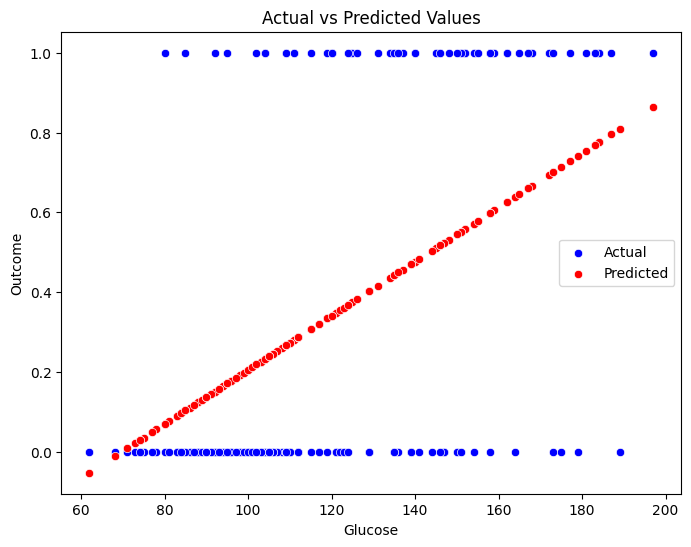

In [40]:
plt.figure(figsize=(8,6))

# Scatter plot of actual 
sns.scatterplot(x=X_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual")

# Scatter plot of predicted
sns.scatterplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")

plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [41]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.17
R² Score: 0.25
